# K-means clustering

## import library

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [39]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

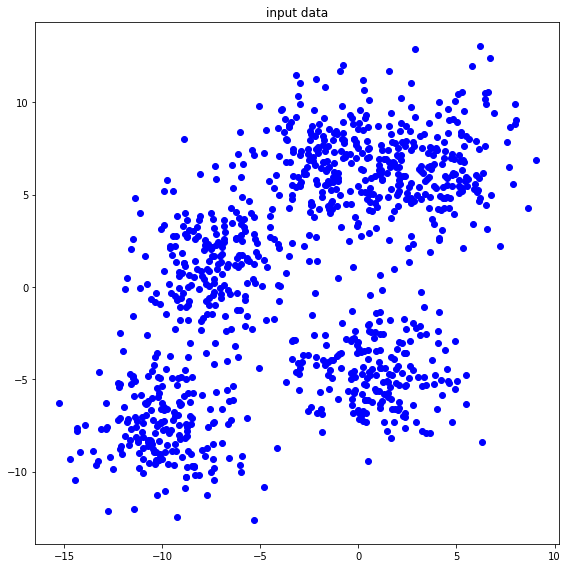

In [40]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [41]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    distance = np.power(feature - center, 2).sum(axis=1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [42]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    index_label     = (label_feature == label)

    if not np.any(index_label):
        centroid        = False

    else:

        feature_label   = feature[index_label, :]
        centroid        = np.mean(feature_label, axis=0)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [43]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_feature = np.argmin(distance, axis=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [44]:
number_cluster          = 2
number_iteration        = 2     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [45]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

label_cluster   = np.arange(number_cluster)
centroid            = np.zeros(shape=(number_cluster, number_feature))
distance            = np.zeros(shape=(number_data, number_cluster))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for i in range(number_iteration):

    for k in range(len(label_cluster)):

        value_label         = label_cluster[k]
        centroid_prev       = centroid[k, :] 
        centroid_new        = compute_centroid(feature, label_feature_02, value_label)

        if not np.any(centroid_new):

            centroid[k, :] = centroid_prev
            
        else:

            centroid[k, :] = centroid_new
            
        distance[:, k] = compute_distance(feature, centroid[k, :])
        centroid_iteration[i, k, :] = centroid[k, :]

    index_label_feature = compute_label(distance)
    label_feature_02       = label_cluster[index_label_feature]
    distance_min        = distance.min(axis=1)
    loss                = np.mean(distance_min)
    loss_iteration_02[i]   = loss


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [46]:
number_cluster          = 4
number_iteration        = 2     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [47]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

label_cluster   = np.arange(number_cluster)
centroid            = np.zeros(shape=(number_cluster, number_feature))
distance            = np.zeros(shape=(number_data, number_cluster))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for i in range(number_iteration):

    for k in range(len(label_cluster)):

        value_label         = label_cluster[k]
        centroid_prev       = centroid[k, :] 
        centroid_new        = compute_centroid(feature, label_feature_04, value_label)

        if not np.any(centroid_new):

            centroid[k, :] = centroid_prev
            
        else:

            centroid[k, :] = centroid_new
            
        distance[:, k] = compute_distance(feature, centroid[k, :])
        centroid_iteration[i, k, :] = centroid[k, :]

    index_label_feature = compute_label(distance)
    label_feature_04       = label_cluster[index_label_feature]
    distance_min        = distance.min(axis=1)
    loss                = np.mean(distance_min)
    loss_iteration_02[i]   = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [48]:
number_cluster          = 8
number_iteration        = 2     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [49]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
label_cluster   = np.arange(number_cluster)
centroid            = np.zeros(shape=(number_cluster, number_feature))
distance            = np.zeros(shape=(number_data, number_cluster))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for i in range(number_iteration):

    for k in range(len(label_cluster)):

        value_label         = label_cluster[k]
        centroid_prev       = centroid[k, :] 
        centroid_new        = compute_centroid(feature, label_feature_08, value_label)

        if not np.any(centroid_new):

            centroid[k, :] = centroid_prev
            
        else:

            centroid[k, :] = centroid_new
            
        distance[:, k] = compute_distance(feature, centroid[k, :])
        centroid_iteration[i, k, :] = centroid[k, :]

    index_label_feature = compute_label(distance)
    label_feature_08       = label_cluster[index_label_feature]
    distance_min        = distance.min(axis=1)
    loss                = np.mean(distance_min)
    loss_iteration_02[i]   = loss

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [50]:
number_cluster          = 16
number_iteration        = 2     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [51]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
label_cluster   = np.arange(number_cluster)
centroid            = np.zeros(shape=(number_cluster, number_feature))
distance            = np.zeros(shape=(number_data, number_cluster))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for i in range(number_iteration):

    for k in range(len(label_cluster)):

        value_label         = label_cluster[k]
        centroid_prev       = centroid[k, :] 
        centroid_new        = compute_centroid(feature, label_feature_16, value_label)

        if not np.any(centroid_new):

            centroid[k, :] = centroid_prev
            
        else:

            centroid[k, :] = centroid_new
            
        distance[:, k] = compute_distance(feature, centroid[k, :])
        centroid_iteration[i, k, :] = centroid[k, :]

    index_label_feature = compute_label(distance)
    label_feature_16       = label_cluster[index_label_feature]
    distance_min        = distance.min(axis=1)
    loss                = np.mean(distance_min)
    loss_iteration_02[i]   = loss

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [52]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [53]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [54]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [55]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [56]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [57]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [58]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [59]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [60]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(centroid_iteration.shape[1]):

        label = ('cluster={}'.format(i))

        if (centroid_iteration[-1, i, 0] > np.power(10, 7)) or (centroid_iteration[-1, i, 1] > np.power(10, 7)):
            pass

        else:
            plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color='blue')
            plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], '-', label=label)
            plt.plot(centroid_iteration[-1, i, 0], centroid_iteration[-1, i, 1], 's', color='red')

    plt.legend()

    for i in range(centroid_iteration.shape[1]):

        if (centroid_iteration[-1, i, 0] > np.power(10, 7)) or (centroid_iteration[-1, i, 1] > np.power(10, 7)):
            pass

        else:
            plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color='blue', label='initial')
            plt.plot(centroid_iteration[-1, i, 0], centroid_iteration[-1, i, 1], 's', color='red', label='final')
            break

    plt.legend()

    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [61]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    for i in range(centroid_iteration.shape[1]):

        label = ('cluster={}'.format(i))

        if (centroid_iteration[-1, i, 0] > np.power(10, 7)) or (centroid_iteration[-1, i, 1] > np.power(10, 7)):
            pass

        else:
            plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color='blue')
            plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], '-', label=label)
            plt.plot(centroid_iteration[-1, i, 0], centroid_iteration[-1, i, 1], 's', color='red')

    plt.legend()

    for i in range(centroid_iteration.shape[1]):

        if (centroid_iteration[-1, i, 0] > np.power(10, 7)) or (centroid_iteration[-1, i, 1] > np.power(10, 7)):
            pass

        else:
            plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color='blue', label='initial')
            plt.plot(centroid_iteration[-1, i, 0], centroid_iteration[-1, i, 1], 's', color='red', label='final')
            break

    plt.legend()

    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [62]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    for i in range(centroid_iteration.shape[1]):

        label = ('cluster={}'.format(i))

        if (centroid_iteration[-1, i, 0] > np.power(10, 7)) or (centroid_iteration[-1, i, 1] > np.power(10, 7)):
            pass

        else:
            plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color='blue')
            plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], '-', label=label)
            plt.plot(centroid_iteration[-1, i, 0], centroid_iteration[-1, i, 1], 's', color='red')

    plt.legend()

    for i in range(centroid_iteration.shape[1]):

        if (centroid_iteration[-1, i, 0] > np.power(10, 7)) or (centroid_iteration[-1, i, 1] > np.power(10, 7)):
            pass

        else:
            plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color='blue', label='initial')
            plt.plot(centroid_iteration[-1, i, 0], centroid_iteration[-1, i, 1], 's', color='red', label='final')
            break

    plt.legend()

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [63]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    for i in range(centroid_iteration.shape[1]):

        label = ('cluster={}'.format(i))

        if (centroid_iteration[-1, i, 0] > np.power(10, 7)) or (centroid_iteration[-1, i, 1] > np.power(10, 7)):
            pass

        else:
            plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color='blue')
            plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], '-', label=label)
            plt.plot(centroid_iteration[-1, i, 0], centroid_iteration[-1, i, 1], 's', color='red')

    plt.legend()

    for i in range(centroid_iteration.shape[1]):

        if (centroid_iteration[-1, i, 0] > np.power(10, 7)) or (centroid_iteration[-1, i, 1] > np.power(10, 7)):
            pass

        else:
            plt.plot(centroid_iteration[0, i, 0], centroid_iteration[0, i, 1], 'o', color='blue', label='initial')
            plt.plot(centroid_iteration[-1, i, 0], centroid_iteration[-1, i, 1], 's', color='red', label='final')
            break

    plt.legend()

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [64]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_cluster = len(label_cluster)
    cmaps = cm.get_cmap('jet', number_cluster)

    plt.scatter(feature[:,0], feature[:,1], c=label_feature_02, cmap=cmaps)
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    plt.clim(-0.5, number_cluster - 0.5)

    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [65]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_cluster = len(label_cluster)
    cmaps = cm.get_cmap('jet', number_cluster)

    plt.scatter(feature[:,0], feature[:,1], c=label_feature_04, cmap=cmaps)
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    plt.clim(-0.5, number_cluster - 0.5)

    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [66]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    number_cluster = len(label_cluster)
    cmaps = cm.get_cmap('jet', number_cluster)

    plt.scatter(feature[:,0], feature[:,1], c=label_feature_08, cmap=cmaps)
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    plt.clim(-0.5, number_cluster - 0.5)

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [67]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_cluster = len(label_cluster)
    cmaps = cm.get_cmap('jet', number_cluster)

    plt.scatter(feature[:,0], feature[:,1], c=label_feature_16, cmap=cmaps)
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    plt.clim(-0.5, number_cluster - 0.5)

    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  6.8211639257
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  0.0000000000
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  0.0000000000
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  0.0000000000
**************************************************
## [RESULT 05]
**************************************************


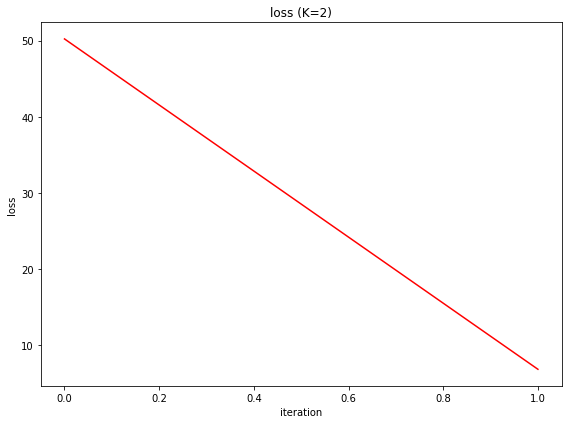

**************************************************
## [RESULT 06]
**************************************************


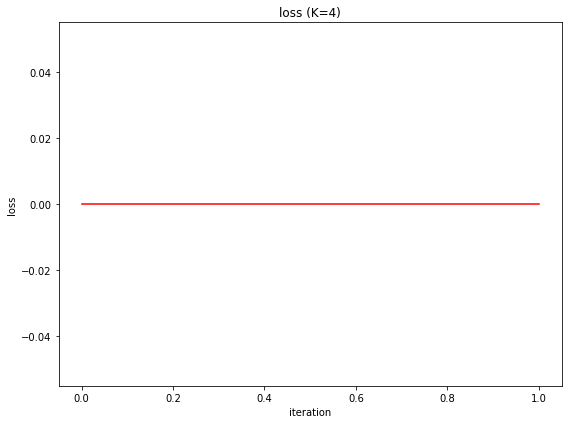

**************************************************
## [RESULT 07]
**************************************************


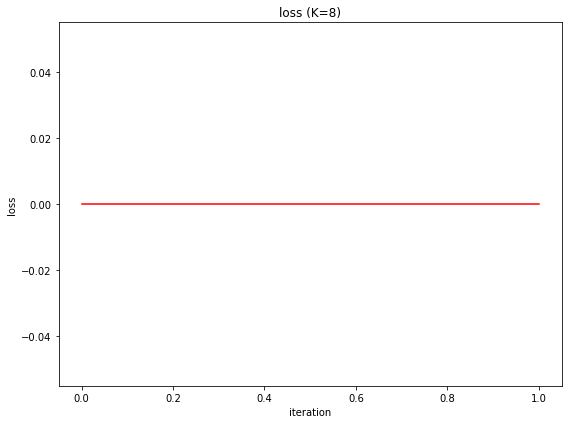

**************************************************
## [RESULT 08]
**************************************************


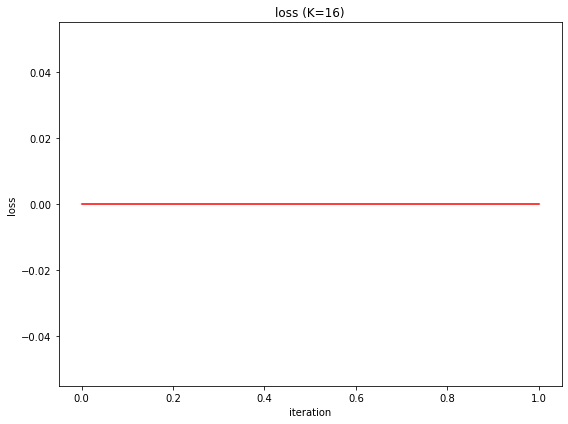

**************************************************
## [RESULT 09]
**************************************************


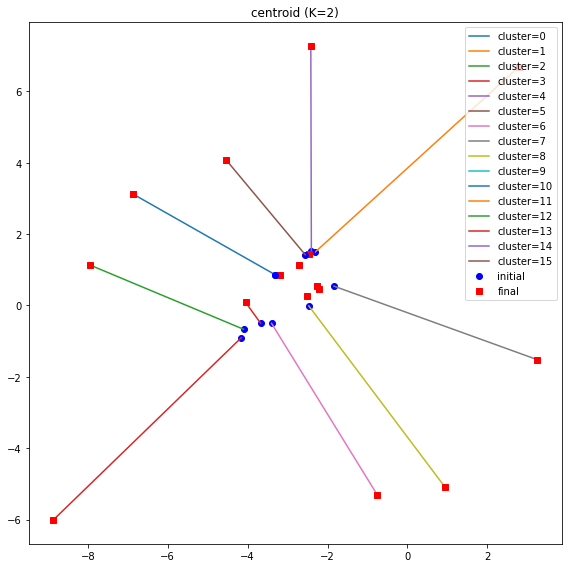

**************************************************
## [RESULT 10]
**************************************************


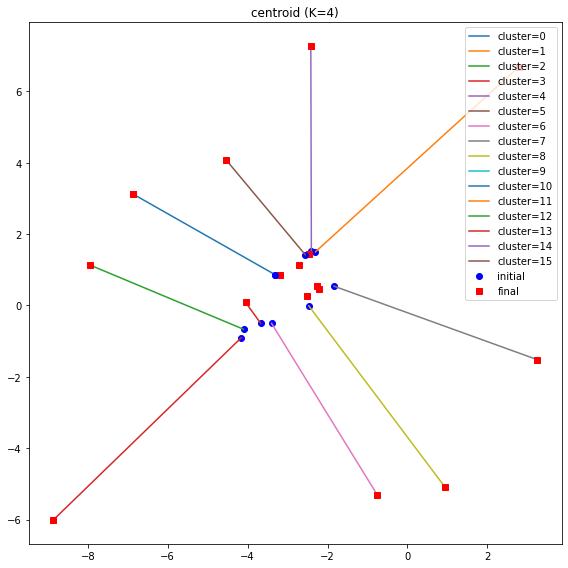

**************************************************
## [RESULT 11]
**************************************************


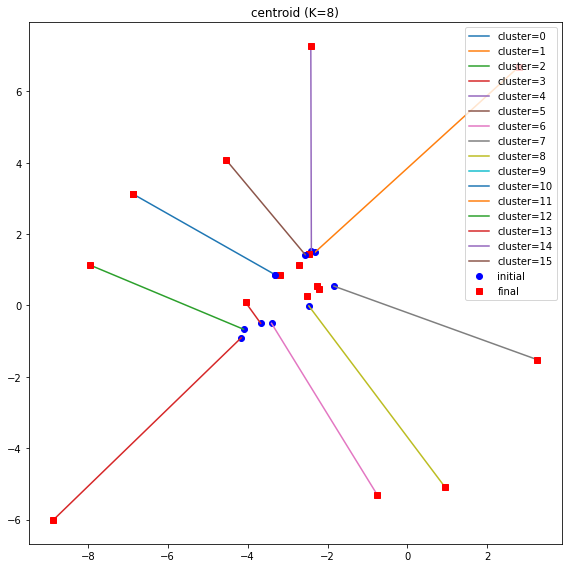

**************************************************
## [RESULT 12]
**************************************************


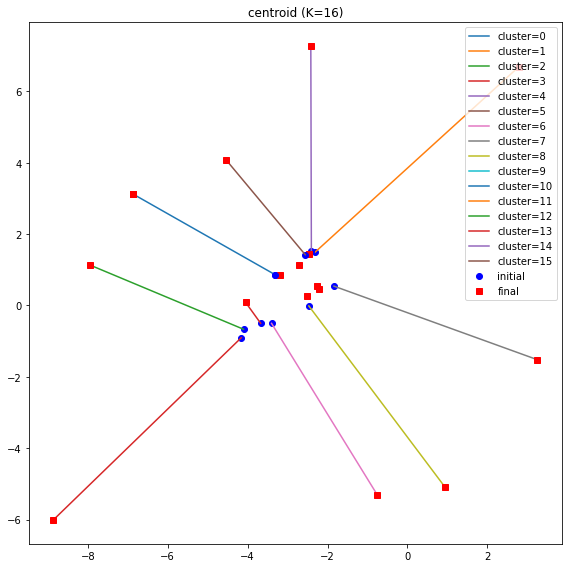

**************************************************
## [RESULT 13]
**************************************************


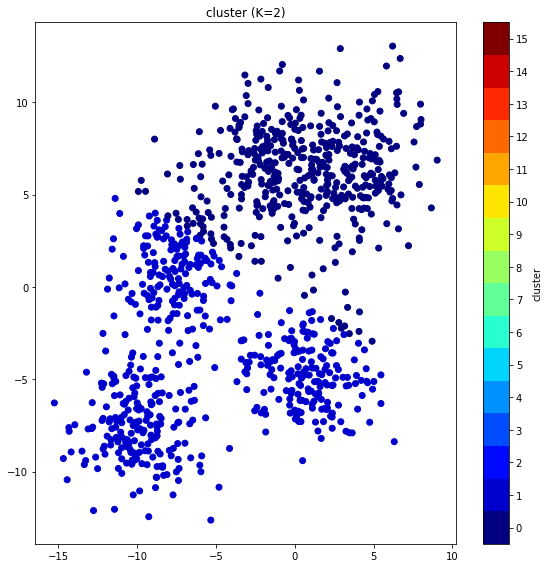

**************************************************
## [RESULT 14]
**************************************************


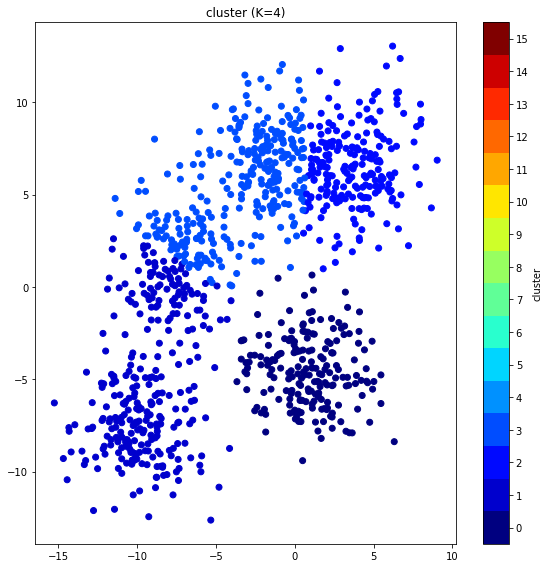

**************************************************
## [RESULT 15]
**************************************************


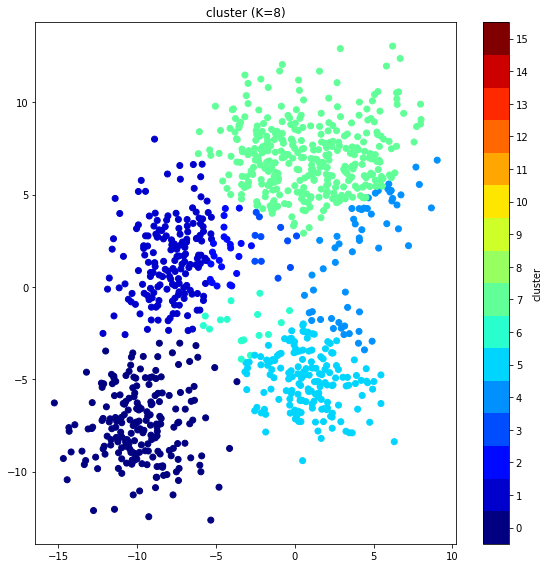

**************************************************
## [RESULT 16]
**************************************************


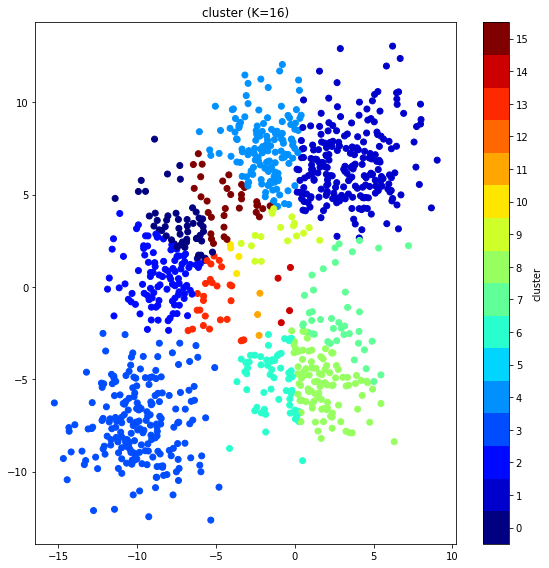

In [68]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)